author of code:
- Analysis: Jason Li
- Historical Data via rapidapi.com: Frank Zhao
- Current Data via rapidapi.com: Jason Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 01-House for Sale

In [2]:
sale = pd.read_csv('/Users/yan/Desktop/Capstone-I/update_df.csv')
sale.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,...,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,...,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,...,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,...,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,...,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


In [5]:
sale.shape

(9562, 25)

In [3]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         9562 non-null   object 
 1   prop_type           9562 non-null   object 
 2   prop_sub_type       7050 non-null   object 
 3   prop_status         9562 non-null   object 
 4   price               9562 non-null   int64  
 5   baths_full          7802 non-null   float64
 6   baths               9562 non-null   int64  
 7   beds                8380 non-null   float64
 8   last_update         9562 non-null   object 
 9   photo_count         9562 non-null   int64  
 10  page_no             9562 non-null   int64  
 11  baths_half          3394 non-null   float64
 12  city                9562 non-null   object 
 13  line                9553 non-null   object 
 14  postal_code         9562 non-null   int64  
 15  state_code          9562 non-null   object 
 16  county

In [4]:
sale.describe()

,price,baths_full,baths,beds,photo_count,page_no,baths_half,postal_code,lat,lon,buiding_size(sqft),lot_size(sqft),agent_id
count,9.562000e+03,7802.000000,9562.000000,8380.000000,9562.000000,9562.000000,3394.000000,9562.000000,9562.000000,9562.000000,8181.000000,7.875000e+03,8.576000e+03
mean,3.817036e+05,1.720969,1.784773,2.759069,21.157394,111.458377,1.072186,19131.385275,39.981264,-75.142621,1711.176995,1.267001e+04,1.643623e+06
std,5.596041e+05,0.913623,1.348765,1.323746,15.888898,64.546626,0.372703,14.072127,0.411565,0.770488,6998.331449,9.267624e+05,1.145329e+06
min,6.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19102.000000,0.000000,-75.333225,0.000000,0.000000e+00,1.235000e+03
25%,1.562500e+05,1.000000,1.000000,2.000000,8.000000,56.000000,1.000000,19122.000000,39.946802,-75.179117,1082.000000,8.110000e+02,7.860200e+05
50%,2.650000e+05,2.000000,2.000000,3.000000,21.000000,112.000000,1.000000,19132.000000,39.977075,-75.160085,1350.000000,1.125000e+03,1.328589e+06
75%,4.349000e+05,2.000000,3.000000,3.000000,30.000000,167.000000,1.000000,19145.000000,40.022996,-75.132523,1885.000000,1.792000e+03,2.649311e+06
max,2.500000e+07,14.000000,14.000000,14.000000,148.000000,223.000000,5.000000,19154.000000,40.138971,0.000000,623182.000000,8.224128e+07,4.162416e+06


In [28]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         9562 non-null   object 
 1   prop_type           9562 non-null   object 
 2   prop_sub_type       7050 non-null   object 
 3   prop_status         9562 non-null   object 
 4   price               9562 non-null   int64  
 5   baths_full          7802 non-null   float64
 6   baths               9562 non-null   int64  
 7   beds                8380 non-null   float64
 8   last_update         9562 non-null   object 
 9   photo_count         9562 non-null   int64  
 10  page_no             9562 non-null   int64  
 11  baths_half          3394 non-null   float64
 12  city                9562 non-null   object 
 13  line                9553 non-null   object 
 14  postal_code         9562 non-null   int64  
 15  state_code          9562 non-null   object 
 16  county

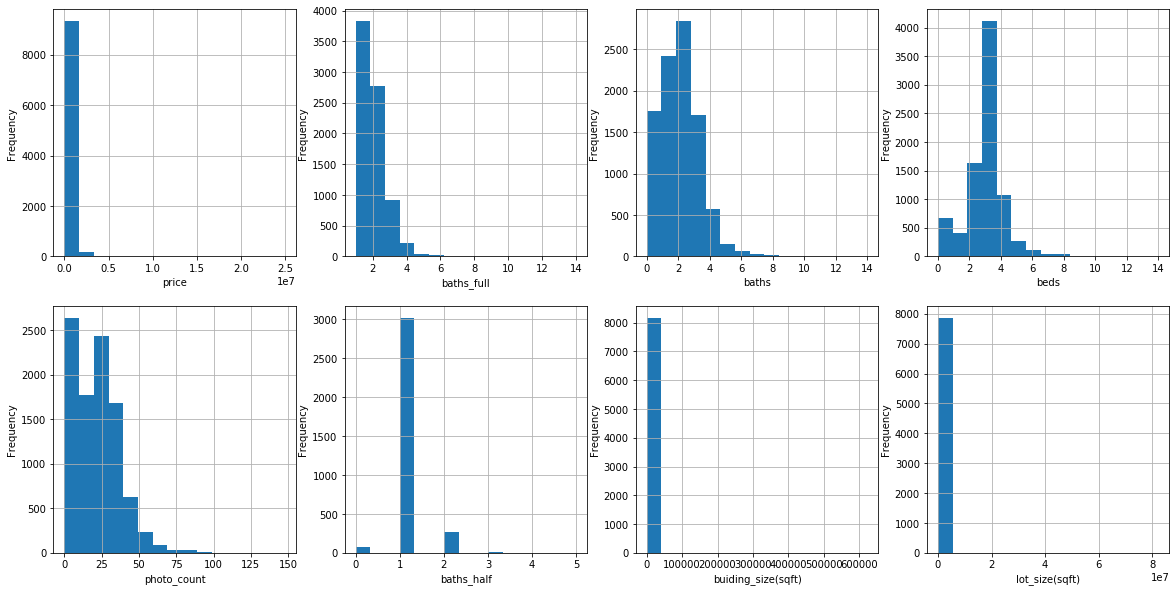

In [35]:
plt.figure(figsize= (20, 10))
columns = ['price', 'baths_full', 'baths', 'beds', 'photo_count', 
           'baths_half',  'buiding_size(sqft)', 'lot_size(sqft)']

for i,col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    sale[col].hist(bins=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')

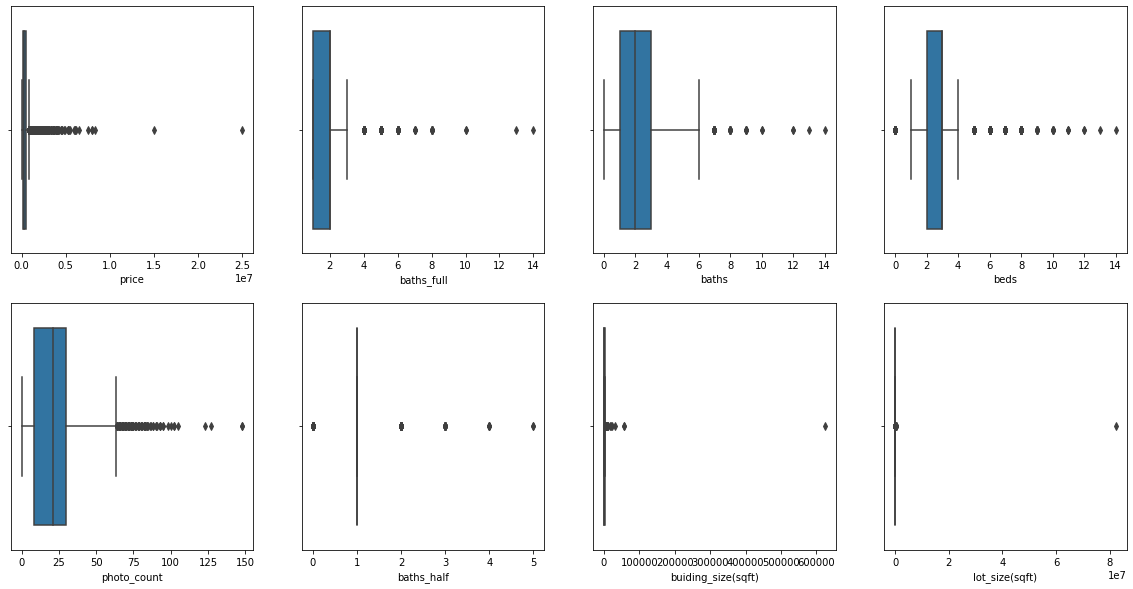

In [41]:
plt.figure(figsize= (20, 10))
columns = ['price', 'baths_full', 'baths', 'beds', 'photo_count', 
           'baths_half',  'buiding_size(sqft)', 'lot_size(sqft)']

for i,col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(sale[col])   

In [72]:
pd.DataFrame(sale['prop_type'].value_counts()).rename_axis('prop_type').rename(columns={'prop_type':'counts'})

,counts
prop_type,
condo,7078
land,1182
multi_family,720
single_family,582


In [73]:
pd.DataFrame(sale['prop_sub_type'].value_counts()).rename_axis('prop_sub_type').rename(columns={'prop_sub_type':'counts'})

,counts
prop_sub_type,
townhomes,5072
condos,1186
duplex_triplex,792


In [74]:
pd.DataFrame(sale['neighborhood_name'].value_counts()).rename_axis('neighborhood_name').rename(columns={'neighborhood_name':'counts'})

,counts
neighborhood_name,
Center City,1728
South Philadelphia,833
West Philadelphia,609
Lower North,458
Far Northeast Philadelphia,356
Kensington,353
Upper North Philadelphia,353
North Delaware,329
Near Northeast Philadelphia,287


In [75]:
pd.DataFrame(sale['postal_code'].value_counts()).rename_axis('postal_code').rename(columns={'postal_code':'counts'})

,counts
postal_code,
19146,636
19147,512
19148,468
19121,461
19123,397
19125,383
19122,368
19103,367
19145,366


### 02-House for Rent

In [76]:
rent = pd.read_csv('/Users/yan/Desktop/Capstone-I/Data/rent_data/rent_data_detail.csv')
rent.head()

,property_id,prop_type,list_date,last_update,year_built,beds,baths_full,price,baths,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),status,lot_size(sqft),brand_name,broker_name
0,R9220820530,condo,2020-08-20T21:07:02.000Z,2020-09-16T13:46:59.000Z,1900.0,2,1.0,1750.0,1.0,13,...,PA,Philadelphia,39.952610,-75.175750,Rittenhouse,863.0,Active,0,BHHS Fox & Roach At the Harper Rittenhouse Square,Berkshire Hathaway HomeServices
1,R9722862130,condo,2020-09-16T17:15:26.000Z,2020-09-16T13:12:24.000Z,1960.0,0,1.0,1250.0,1.0,13,...,PA,Philadelphia,39.928213,-75.150469,Pennsport,3120.0,Active,0,By Real Estate,NaN
2,R9175211338,townhome,2020-09-13T02:05:48.000Z,2020-09-14T21:30:22.000Z,1925.0,1,1.0,1050.0,1.0,13,...,PA,Philadelphia,40.010798,-75.160560,Tioga,772.0,Active,0,United Real Estate - Philadelphia,NaN
3,R4647948039,condo,2020-09-10T20:09:38.000Z,2020-09-12T10:18:11.000Z,1900.0,2,2.0,2800.0,2.0,13,...,PA,Philadelphia,39.948597,-75.165901,Center City,1272.0,Active,0,Keller Williams Philadelphia,NaN
4,R4651413772,condo,2020-09-10T19:59:13.000Z,2020-09-12T10:12:10.000Z,1900.0,1,1.0,2100.0,2.0,13,...,PA,Philadelphia,39.948597,-75.165901,Center City,962.0,Active,0,Keller Williams Philadelphia,NaN


In [80]:
rent.shape

(5277, 25)

In [77]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5277 entries, 0 to 5276
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         5277 non-null   object 
 1   prop_type           5277 non-null   object 
 2   list_date           4287 non-null   object 
 3   last_update         5277 non-null   object 
 4   year_built          3891 non-null   float64
 5   beds                5277 non-null   int64  
 6   baths_full          5246 non-null   float64
 7   price               5277 non-null   float64
 8   baths               5249 non-null   float64
 9   photo_count         5277 non-null   int64  
 10  baths_half          630 non-null    float64
 11  garage              395 non-null    float64
 12  city                5277 non-null   object 
 13  line                5275 non-null   object 
 14  postal_code         5277 non-null   int64  
 15  state_code          5277 non-null   object 
 16  county

In [78]:
rent.describe()

,year_built,beds,baths_full,price,baths,photo_count,baths_half,garage,postal_code,lat,lon,buiding_size(sqft),lot_size(sqft)
count,3891.000000,5277.000000,5246.000000,5277.000000,5249.000000,5277.000000,630.000000,395.000000,5277.000000,5277.000000,5277.000000,4331.000000,5277.000000
mean,1948.374197,1.755353,1.374571,1808.652075,1.499714,17.063483,1.049206,126.313924,19121.177942,39.963107,-75.164661,3142.421381,63.357211
std,45.794060,1.142198,0.642767,881.327307,0.778945,9.795751,0.244086,299.067897,16.593521,0.027746,0.027871,19832.758479,1027.080559
min,1750.000000,0.000000,1.000000,334.000000,1.000000,0.000000,1.000000,1.000000,18933.000000,39.885960,-75.434111,100.000000,0.000000
25%,1915.000000,1.000000,1.000000,1300.000000,1.000000,10.000000,1.000000,1.000000,19104.000000,39.947805,-75.175295,700.000000,0.000000
50%,1927.000000,2.000000,1.000000,1625.000000,1.000000,16.000000,1.000000,1.000000,19122.000000,39.954578,-75.165004,1024.000000,0.000000
75%,2006.000000,2.000000,2.000000,2070.000000,2.000000,23.000000,1.000000,3.000000,19133.000000,39.973948,-75.151470,1671.500000,0.000000
max,2020.000000,9.000000,7.000000,12000.000000,7.000000,82.000000,3.000000,888.000000,19154.000000,40.404568,-74.968593,626685.000000,30633.000000


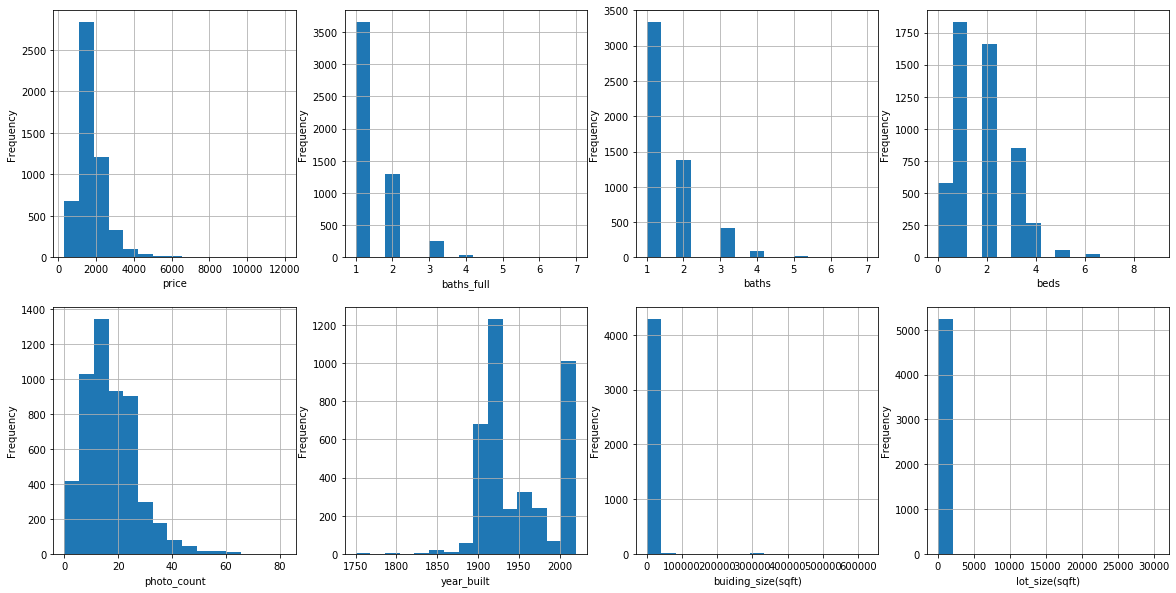

In [82]:
plt.figure(figsize= (20, 10))
columns = ['price', 'baths_full', 'baths', 'beds', 'photo_count', 
           'year_built', 'buiding_size(sqft)', 'lot_size(sqft)']

for i,col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    rent[col].hist(bins=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')

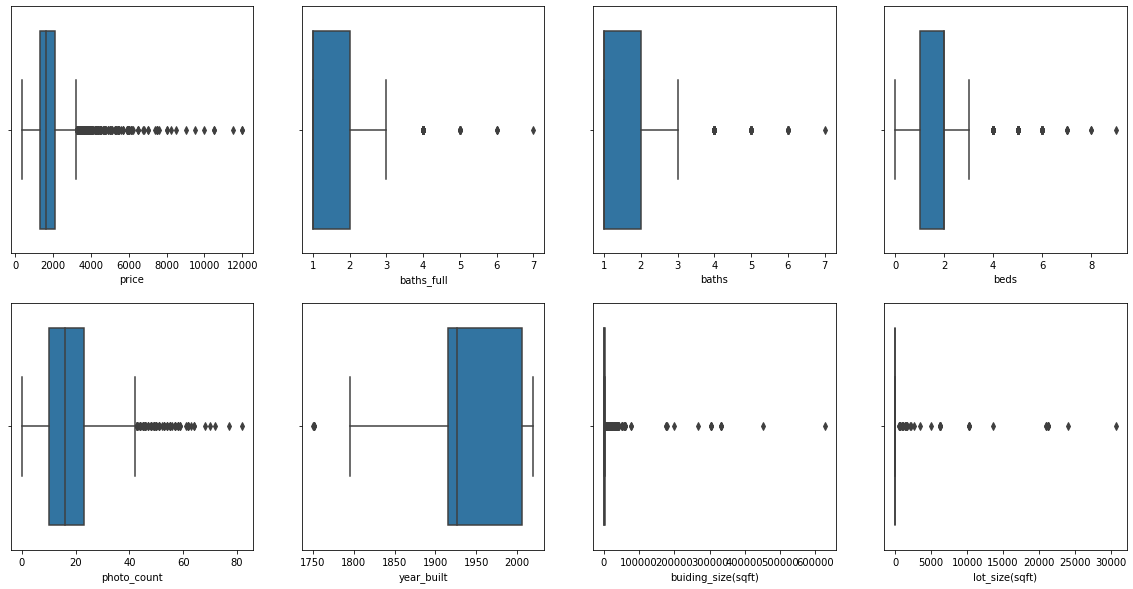

In [84]:
plt.figure(figsize= (20, 10))
columns = ['price', 'baths_full', 'baths', 'beds', 'photo_count', 
           'year_built', 'buiding_size(sqft)', 'lot_size(sqft)']

for i,col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(rent[col])  

In [86]:
rent.columns

Index(['property_id', 'prop_type', 'list_date', 'last_update', 'year_built',
       'beds', 'baths_full', 'price', 'baths', 'photo_count', 'baths_half',
       'garage', 'city', 'line', 'postal_code', 'state_code', 'county', 'lat',
       'lon', 'neighborhood_name', 'buiding_size(sqft)', 'status',
       'lot_size(sqft)', 'brand_name', 'broker_name'],
      dtype='object')

In [87]:
pd.DataFrame(rent['prop_type'].value_counts()).rename_axis('prop_type').rename(columns={'prop_type':'counts'})

,counts
prop_type,
condo,3217
townhome,1116
apartment,638
single_family,214
duplex_triplex,86
other,4
multi_family,2


In [88]:
pd.DataFrame(rent['postal_code'].value_counts()).rename_axis('postal_code').rename(columns={'postal_code':'counts'})

,counts
postal_code,
19103,800
19107,469
19106,389
19146,356
19121,346
19102,343
19147,334
19130,308
19123,272


In [89]:
pd.DataFrame(rent['neighborhood_name'].value_counts()).rename_axis('neighborhood_name').rename(columns={'neighborhood_name':'counts'})

,counts
neighborhood_name,
Center City,1231
Rittenhouse,580
Logan Square,367
North Central,202
Fishtown,128
Graduate Hospital,124
Point Breeze,120
Rittenhouse Square,101
Queen Village,97
